In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the dataset
df = pd.read_csv('Desktop/archive/1. Weather Data.csv')

In [3]:
df.shape

(8784, 8)

In [4]:
df.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [5]:
#missing values
missing_values  = df.isnull().sum()
missing_values

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [6]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [7]:
#summary statistics
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [8]:
#Identifying outliers using IQR
df_numeric = df.select_dtypes(include=[float, int])
Q1 = df_numeric.quantile(0.25, numeric_only = True)
Q3 = df_numeric.quantile(0.75, numeric_only = True)
IQR = Q3 - Q1

In [9]:
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
outliers.sum()

Temp_C                 0
Dew Point Temp_C       0
Rel Hum_%              2
Wind Speed_km/h      162
Visibility_km       3539
Press_kPa            207
dtype: int64

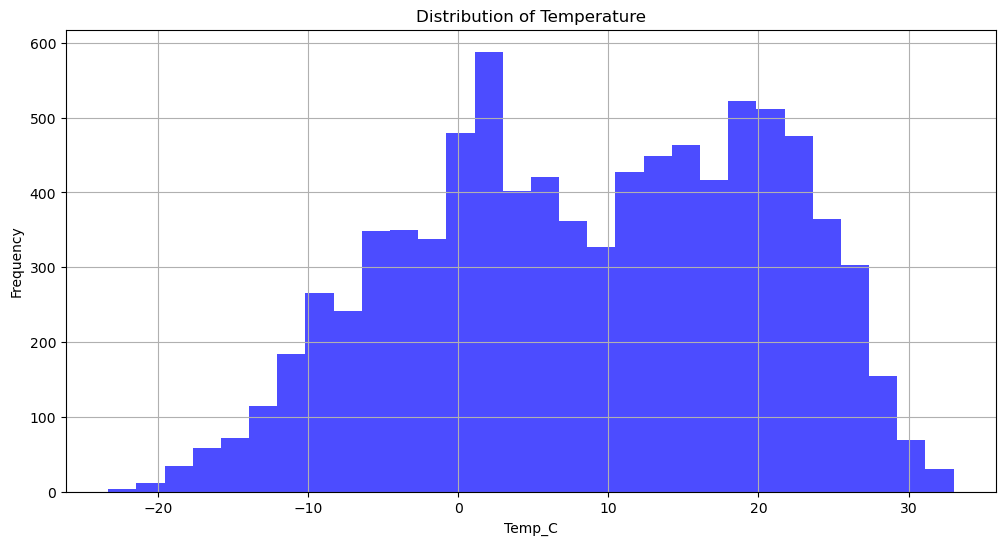

In [10]:
plt.figure(figsize=(12, 6))
df['Temp_C'].hist(bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Temperature')
plt.xlabel('Temp_C')
plt.ylabel('Frequency')
plt.show()

In [11]:
#Value counts to interact with the categorical data
wind_speed_count = df["Wind Speed_km/h"].value_counts()
wind_speed_count

9     830
11    791
13    735
15    719
7     677
17    666
19    616
6     609
20    496
4     474
22    439
24    374
0     309
26    242
28    205
30    161
32    139
33     85
35     53
37     45
39     24
41     22
44     14
43     13
48     13
46     11
52      7
57      5
50      4
2       2
83      1
70      1
63      1
54      1
Name: Wind Speed_km/h, dtype: int64

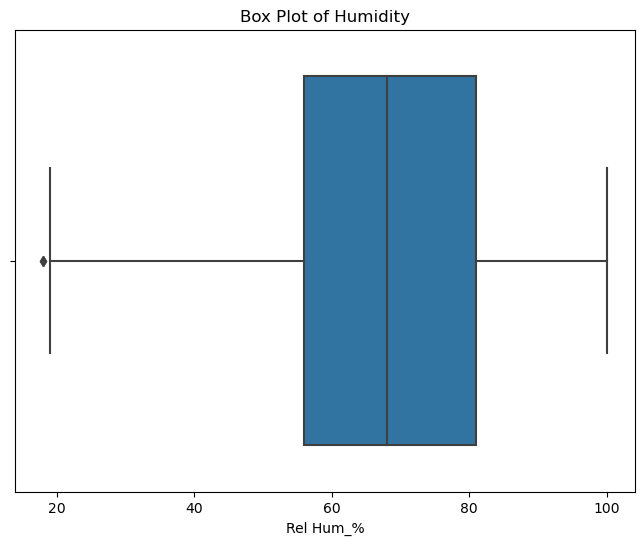

In [12]:
#Box plot to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rel Hum_%'])
plt.title('Box Plot of Humidity')
plt.show()

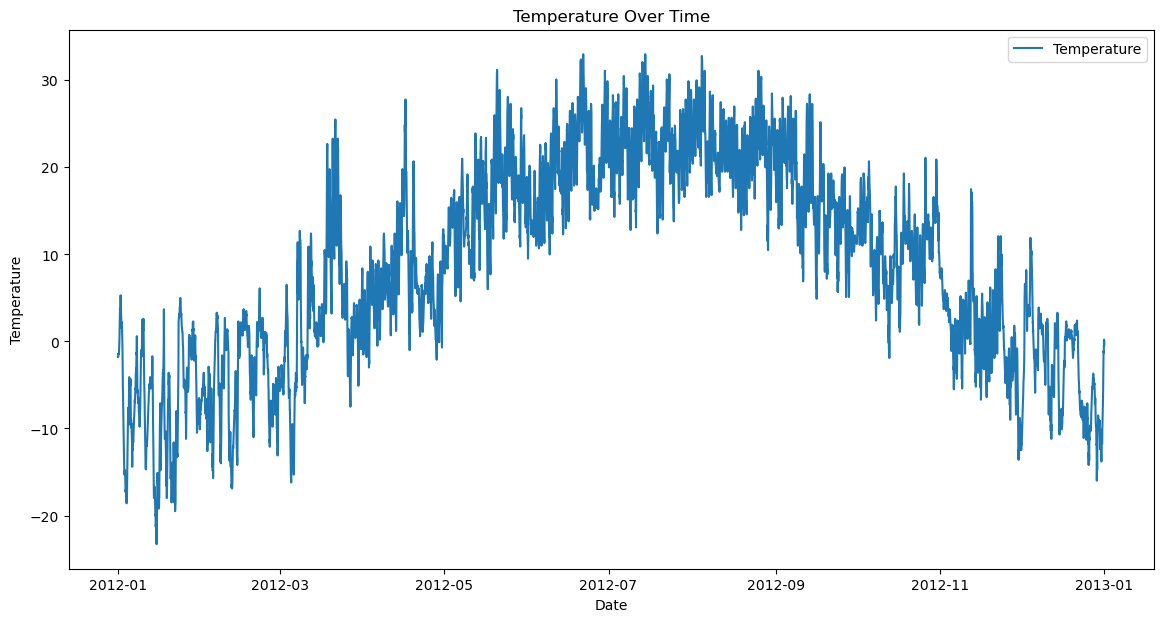

In [18]:
#Time series
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
plt.figure(figsize=(14, 7))
plt.plot(df['Date/Time'], df['Temp_C'], label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [21]:
#Correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


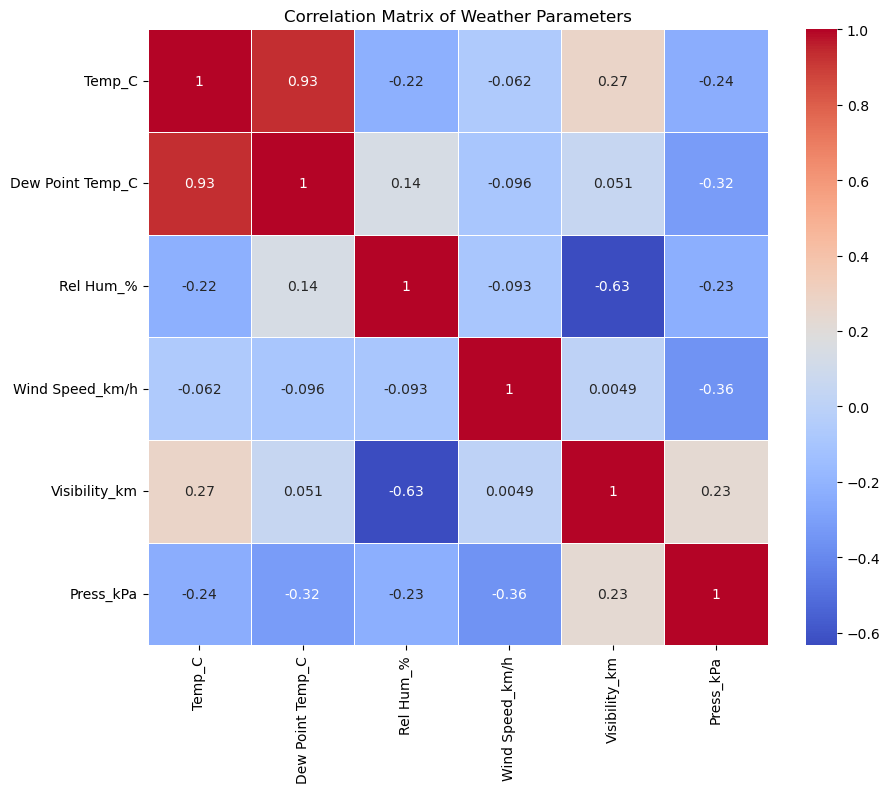

In [22]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

In [27]:
#observing seasonal variations
df['Month'] = df['Date/Time'].dt.month
monthly_avg_temp = df.groupby('Month')['Temp_C'].mean()

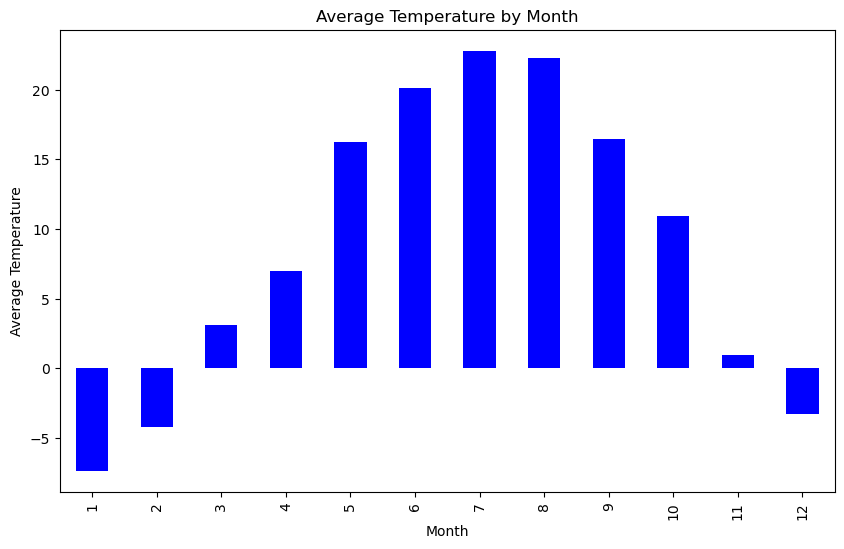

In [29]:
plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='bar', color='blue')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.show()

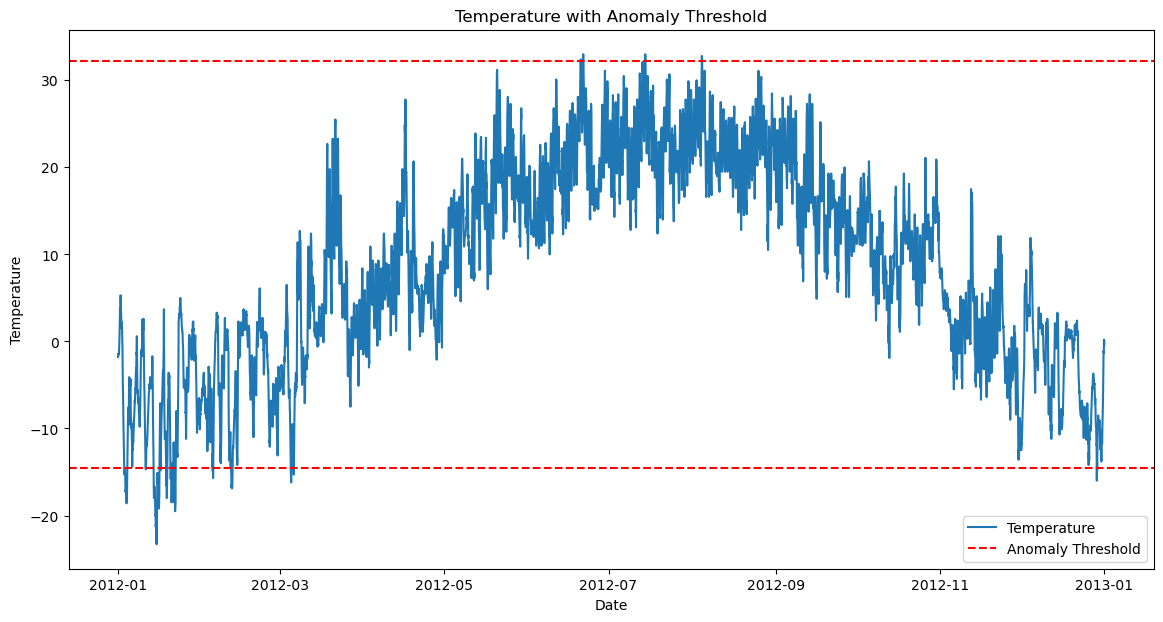

In [31]:
#Anomalies in temperature
plt.figure(figsize=(14, 7))
plt.plot(df['Date/Time'], df['Temp_C'], label='Temperature')
plt.axhline(y=df['Temp_C'].mean() + 2*df['Temp_C'].std(), color='r', linestyle='--', label='Anomaly Threshold')
plt.axhline(y=df['Temp_C'].mean() - 2*df['Temp_C'].std(), color='r', linestyle='--')
plt.title('Temperature with Anomaly Threshold')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()